In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report

In [81]:
df = pd.read_csv("dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2023 (1).csv")

In [82]:
df

,collision_index,collision_year,collision_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2023010419171,2023,010419171,1,1,3,2,20,4,3,5,1,0,0,0,0,1,10,E01030370
1,2023010419183,2023,010419183,2,1,1,1,25,5,3,0,0,0,0,0,9,1,3,E01001546
2,2023010419183,2023,010419183,3,2,2,2,38,7,3,0,0,2,0,0,9,-1,-1,-1
3,2023010419189,2023,010419189,1,1,1,1,50,8,3,0,0,0,0,0,9,1,5,E01002443
4,2023010419191,2023,010419191,2,1,1,1,34,6,3,0,0,0,0,0,1,1,2,E01004679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62669,2023991365442,2023,991365442,1,1,1,1,32,6,2,0,0,0,0,0,9,1,6,-1
62670,2023991366101,2023,991366101,1,1,3,2,30,6,3,5,9,0,0,2,0,-1,-1,-1
62671,2023991366235,2023,991366235,1,1,3,2,50,8,2,8,7,0,0,2,0,-1,-1,-1
62672,2023991369054,2023,991369054,2,1,1,1,36,7,2,0,0,0,0,0,9,-1,-1,-1


In [83]:
df.head()

,collision_index,collision_year,collision_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2023010419171,2023,010419171,1,1,3,2,20,4,3,5,1,0,0,0,0,1,10,E01030370
1,2023010419183,2023,010419183,2,1,1,1,25,5,3,0,0,0,0,0,9,1,3,E01001546
2,2023010419183,2023,010419183,3,2,2,2,38,7,3,0,0,2,0,0,9,-1,-1,-1
3,2023010419189,2023,010419189,1,1,1,1,50,8,3,0,0,0,0,0,9,1,5,E01002443
4,2023010419191,2023,010419191,2,1,1,1,34,6,3,0,0,0,0,0,1,1,2,E01004679


In [84]:
df.drop(columns=["collision_index","collision_year","collision_reference","lsoa_of_casualty","vehicle_reference"],inplace=True)

In [85]:
df.head()

,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,1,3,2,20,4,3,5,1,0,0,0,0,1,10
1,1,1,1,25,5,3,0,0,0,0,0,9,1,3
2,2,2,2,38,7,3,0,0,2,0,0,9,-1,-1
3,1,1,1,50,8,3,0,0,0,0,0,9,1,5
4,1,1,1,34,6,3,0,0,0,0,0,1,1,2


In [86]:
#check if there is null or unique value
df.isnull().sum()

casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

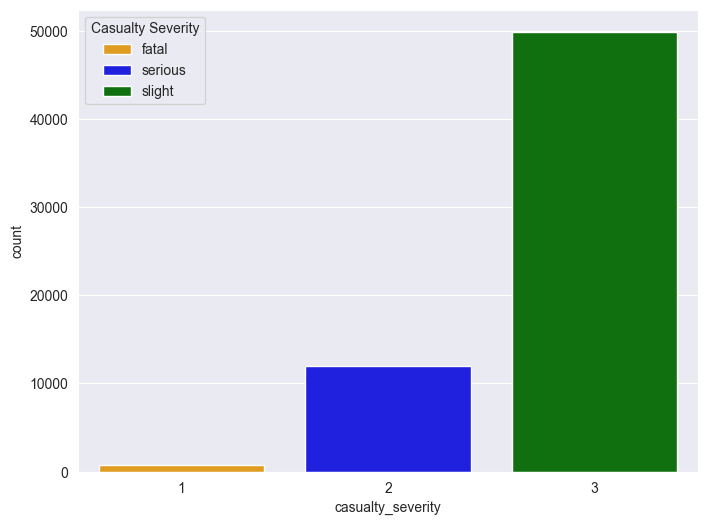

In [87]:
#checking the counts based on casuality severity
casualty_severity_count = df['casualty_severity'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', hue='casualty_severity', data=df, palette=['orange','blue','green'])
plt.legend(title='Casualty Severity', labels=['fatal', 'serious', 'slight'])
plt.show()

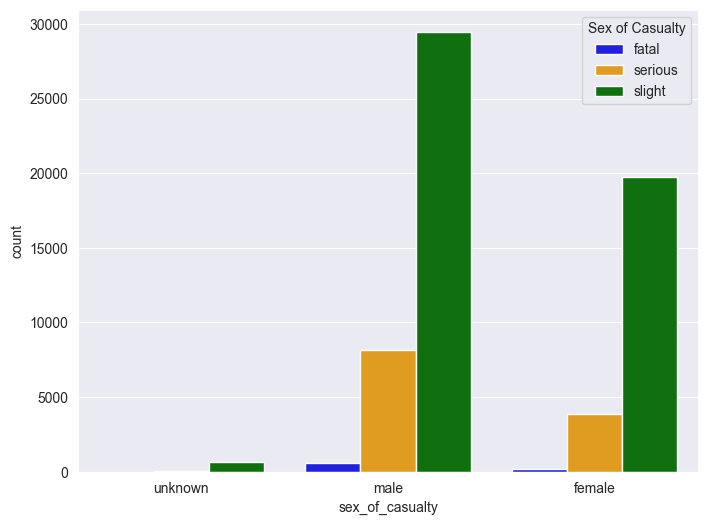

In [88]:
df = df.drop(df[df.sex_of_casualty > 2].index) #remove unique number [e.g: 9]
plt.figure(figsize=(8, 6))
sns.countplot(x='sex_of_casualty', hue='casualty_severity', data=df, palette=['blue','orange','green'])
plt.legend(title='Sex of Casualty', labels=['fatal', 'serious', 'slight'])
#important to note that unknown : -1, male: 1, female: 2
plt.xticks([0,1,2],['unknown','male','female'])
plt.show()

In [89]:
df.columns

Index(['casualty_reference', 'casualty_class', 'sex_of_casualty',
       'age_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'pedestrian_location', 'pedestrian_movement', 'car_passenger',
       'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker',
       'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')

In [90]:
features = ['casualty_reference', 'casualty_class', 'sex_of_casualty',
       'age_of_casualty', 'age_band_of_casualty',
       'pedestrian_location', 'pedestrian_movement', 'car_passenger',
       'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker',
       'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile']

from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df[features]  # Features
y = df['casualty_severity'] 

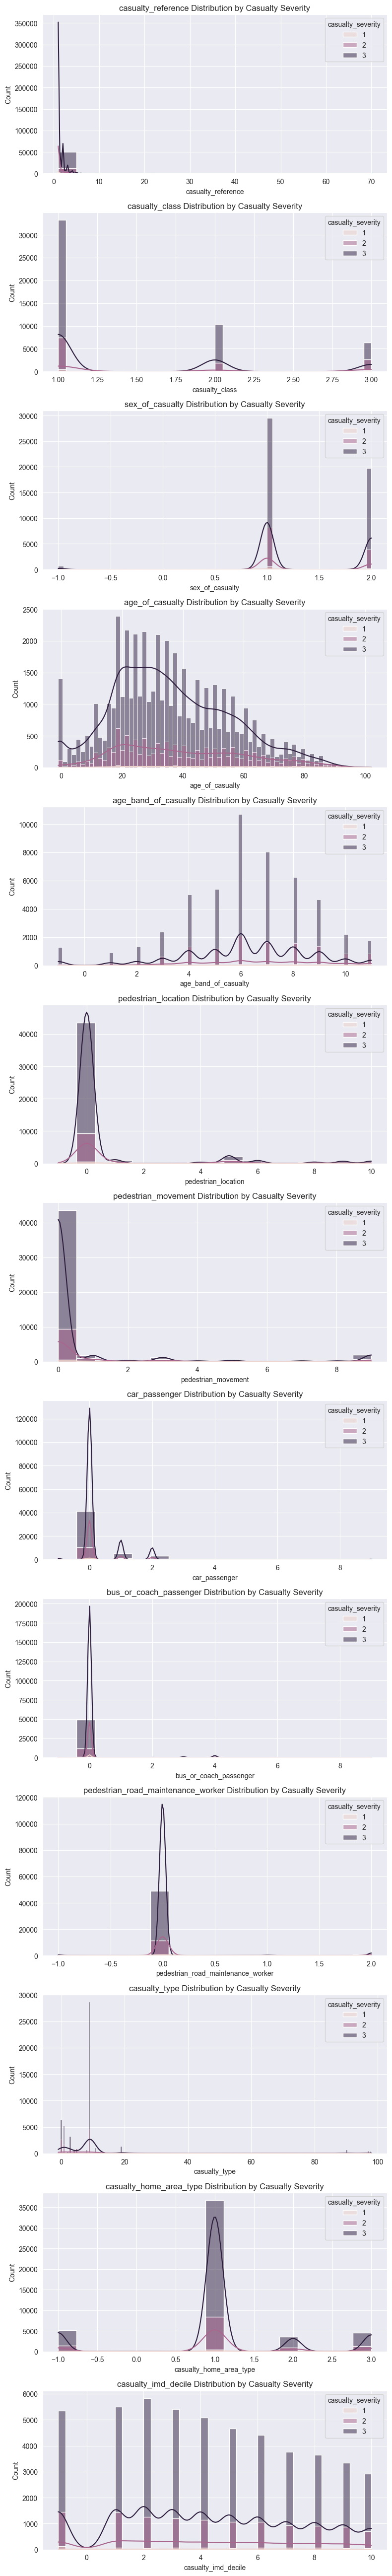

In [91]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create subplots
fig, axes = plt.subplots(len(features), 1, figsize=(8, 4 * len(features)))  # Adjust figsize as needed

# Loop through features and create histograms
for i, feature in enumerate(features):
    # Histogram of feature
    sns.histplot(x=feature, hue='casualty_severity', data=df, ax=axes[i], alpha=0.5, kde=True)
    axes[i].set_title(f'{feature} Distribution by Casualty Severity')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust layout (optional)
fig.tight_layout()

# Display the plot
plt.show()


In [92]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) #assume k = 3

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

#Calculate the accuracy
accuracy_knn = accuracy_score(y_test,y_pred)

# Calculate test error
test_error_knn = 1 - accuracy_knn
print("KNN Accuracy:", accuracy_knn)
print("Test Error:", test_error_knn)

KNN Accuracy: 0.7439763842348811
Test Error: 0.2560236157651189


In [93]:
from sklearn.naive_bayes import GaussianNB
# Instantiate the Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy_nb)

# Calculate test error
test_error_nb = 1 - accuracy_nb
print("Test Error:", test_error_nb)

Naive Bayes Accuracy: 0.7265039093665231
Test Error: 0.2734960906334769


In [94]:
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

# Instantiate the LDA classifier
lda = LDA()

# Fit the model on the training data
lda.fit(X_train, y_train)

# Predictions on the test data
y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("LDA Accuracy:", accuracy)


# Instantiate the QDA classifier
qda = QDA()

# Fit the model on the training data
qda.fit(X_train, y_train)

# Predictions on the test data
y_pred_qda = qda.predict(X_test)

# Calculate accuracy
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print("QDA Accuracy:", accuracy_qda)

LDA Accuracy: 0.7975107707036859
QDA Accuracy: 0.7194032232328068


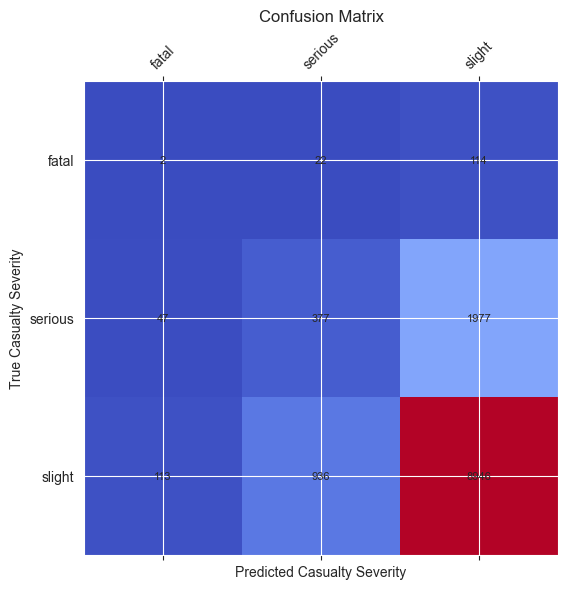


Classification Report:
               precision    recall  f1-score   support

       fatal       0.01      0.01      0.01       138
     serious       0.28      0.16      0.20      2401
      slight       0.81      0.90      0.85      9995

    accuracy                           0.74     12534
   macro avg       0.37      0.36      0.36     12534
weighted avg       0.70      0.74      0.72     12534


In [95]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

model = knn

# Make predictions on the test set using the chosen model
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix visualization (using Matplotlib)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap='coolwarm')

# Add labels and title
ax.set_xlabel('Predicted Casualty Severity')
ax.set_ylabel('True Casualty Severity')
ax.set_title('Confusion Matrix')

for (i, j), value in np.ndenumerate(cm):
    ax.text(j, i, value, ha='center', va='center', fontsize=8)
    


plt.xticks([0, 1, 2], ['fatal', 'serious', 'slight'], rotation=45)  # Rotate x-axis labels
plt.yticks([0, 1, 2], ['fatal', 'serious', 'slight'])

plt.tight_layout()
plt.show()

# Get classification report
report = classification_report(y_test, y_pred, target_names=['fatal', 'serious', 'slight'])

# Print the classification report
print("\nClassification Report:\n", report)


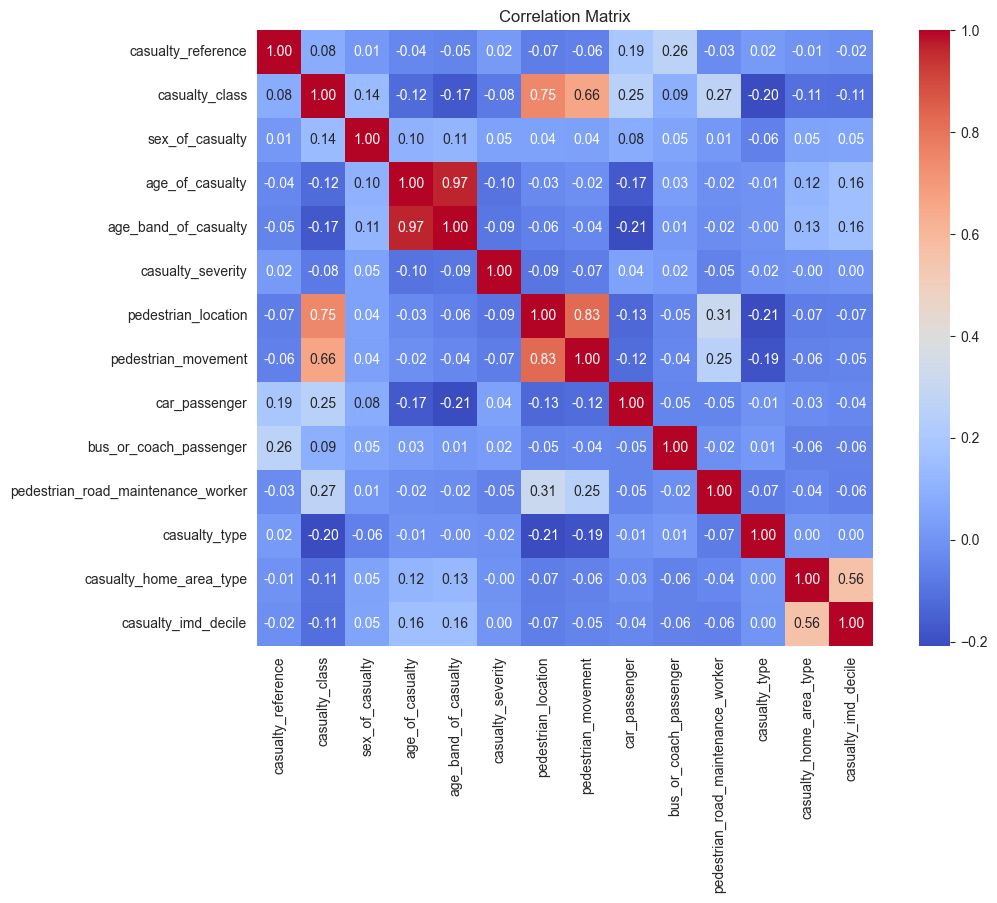

Highly Correlated Features:
('pedestrian_movement', 'pedestrian_location')
('age_band_of_casualty', 'age_of_casualty')


In [96]:
corr_matrix = df.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering
# Example: Remove highly correlated features
threshold = 0.8  # Define a threshold for correlation coefficient
highly_correlated = set()  # Store pairs of highly correlated features
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            highly_correlated.add((colname_i, colname_j))

# Print highly correlated features
print("Highly Correlated Features:")
for pair in highly_correlated:
    print(pair)

In [98]:
# Combine age_band_of_casualty and age_of_casualty by calculating the mean
df['combined_age'] = (df['age_band_of_casualty'] + df['age_of_casualty']) / 2

#remove one of the features to remove redundancy
df.drop(columns='pedestrian_location',inplace=True)

In [106]:
features = ['casualty_reference', 'casualty_class', 'sex_of_casualty', 'combined_age', 'pedestrian_movement', 'car_passenger',
       'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker',
       'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile']

# Define the features and target variable
X = df[features]  # Features
y = df['casualty_severity']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=19) 

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

#Calculate the accuracy
accuracy_knn = accuracy_score(y_test,y_pred)

# Calculate test error
test_error_knn = 1 - accuracy_knn
print("KNN Accuracy:", accuracy_knn)
print("Test Error:", test_error_knn)

KNN Accuracy: 0.7947183660443593
Test Error: 0.2052816339556407


In [108]:
from sklearn.model_selection import GridSearchCV

# Define a range of k values to search
k_values = list(range(1, 21))  # Example: search for k from 1 to 20

# Create a parameter grid
param_grid = {'n_neighbors': k_values}

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']

# Re-train the KNN model using the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Predictions on the test data
y_pred = best_knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred)

# Calculate test error
test_error_knn = 1 - accuracy_knn

print("Best K:", best_k)
print("KNN Accuracy:", accuracy_knn)
print("Test Error:", test_error_knn)



Best K: 19
KNN Accuracy: 0.7947183660443593
Test Error: 0.2052816339556407


In [109]:
y_pred = best_knn.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[   0   14  124]
 [   0  187 2214]
 [   0  221 9774]]


In [117]:
memory = {0: 0, 1: 1}
def fib(n):
    if n not in memory:
        memory[n] = fib(n-1) + fib(n-2)
    return memory[n]

fib(7)

13

In [119]:
def fib(n):
    if n == 0:
        return 0
    prev_fib = 0
    current_fib = 1
    for _ in range(n-1):
        new_fib = prev_fib + current_fib
        prev_fib = current_fib
        current_fib = new_fib
    return current_fib

fib(7)

13